<a href="https://colab.research.google.com/github/rushi2012/Ensamble_Algo/blob/main/Ensamble_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [ ]:
df = pd.read_csv('/content/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer
        
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int64
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int8 
 16  Target     45211 non-null  int8 
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


(None,                 age           job  ...      poutcome        Target
 count  45211.000000  45211.000000  ...  45211.000000  45211.000000
 mean      40.936210      4.339762  ...      2.559974      0.116985
 std       10.618762      3.272657  ...      0.989059      0.321406
 min       18.000000      0.000000  ...      0.000000      0.000000
 25%       33.000000      1.000000  ...      3.000000      0.000000
 50%       39.000000      4.000000  ...      3.000000      0.000000
 75%       48.000000      7.000000  ...      3.000000      0.000000
 max       95.000000     11.000000  ...      3.000000      1.000000
 
 [8 rows x 17 columns])

In [ ]:
corr = df.corr()
corr

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


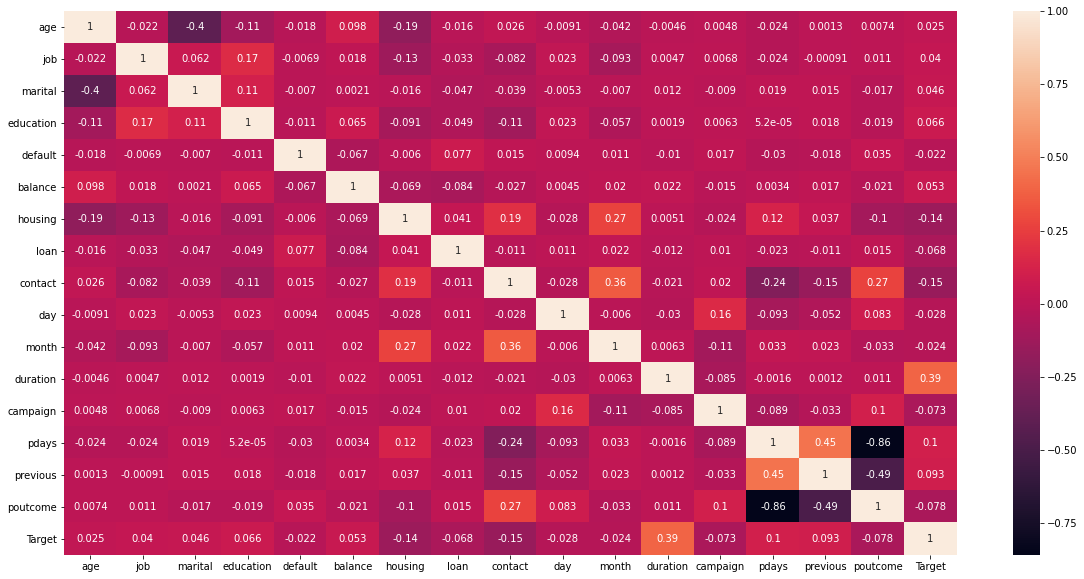

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [ ]:
corr.mean()

age          0.019513
job          0.055617
marital      0.041987
education    0.059414
default      0.057016
balance      0.059927
housing      0.051999
loan         0.048457
contact      0.060152
day          0.061008
month        0.080885
duration     0.076110
campaign     0.052466
pdays        0.020646
previous     0.053362
poutcome    -0.004660
Target       0.072920
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

X = df.drop(['contact','Target'], axis=1)
y = df['Target']

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.8954992812119872
The confusion matrix of Random Forest Model is
[[7962   32]
 [ 913  136]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.8888643149397324
The confusion matrix of Adaboost Ensemble model is
[[7726  268]
 [ 737  312]]


In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9026871613402632
The confusion matrix of Bagging classifier model is
[[7742  252]
 [ 628  421]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.8974897710936636
The confusion matrix of Gradient Boost classifier model is
[[7855  139]
 [ 788  261]]


In [ ]:
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Random forest model accuracy is 0.8972279563550575
The Adaboost Ensemble model accuracy is 0.8915511648481274
The Bagging classifier model accuracy is 0.9057800058979653
The Gradient Boost classifier model accuracy is 0.90002948982601
